<a href="https://colab.research.google.com/github/abdulaziz-snobra/Students_peroformance_Multiple_Linear_Regression/blob/main/Student_performance_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Student Peroformance Multiple linear regression

* In this lab we make Multiple linear regression on student performance datast.

* Our goal from that dataset is to see what is the most fafctors affect the perofrmance.

* Using main Packages( pandas, numpy, seaborn, sklearn, statsmodels)

* Dataset could be found in kaggle [Dowload Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

* The dataset only foucses in the efforts that the students makes Like(study houres, previous scores ,...), and didcot mentiond the race or the sex of the student. So in this case we are triyng to find a best way for improving the performance regardless for any *genetic* factors.






## Data Preperation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)

In [5]:
performance= pd.read_csv('/content/Student_Performance.csv')

In [6]:
performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
performance.shape

(10000, 6)

* The data set is already cleand(no null values)

In [8]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


* Using sklearn method for encoding categorical columns (Extracurricular Activities)

In [9]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
performance['Extracurricular Activities'] = LE.fit_transform(performance['Extracurricular Activities'])

## Data ANalysis

In [10]:

performance.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


* sns pairplot method plot every column with the others so we could analyise and se what features affect mostly in the performance

* As we can see previous has a positive linear relation with the Previous Score

* Also numper oh a hours slightly increases the performance

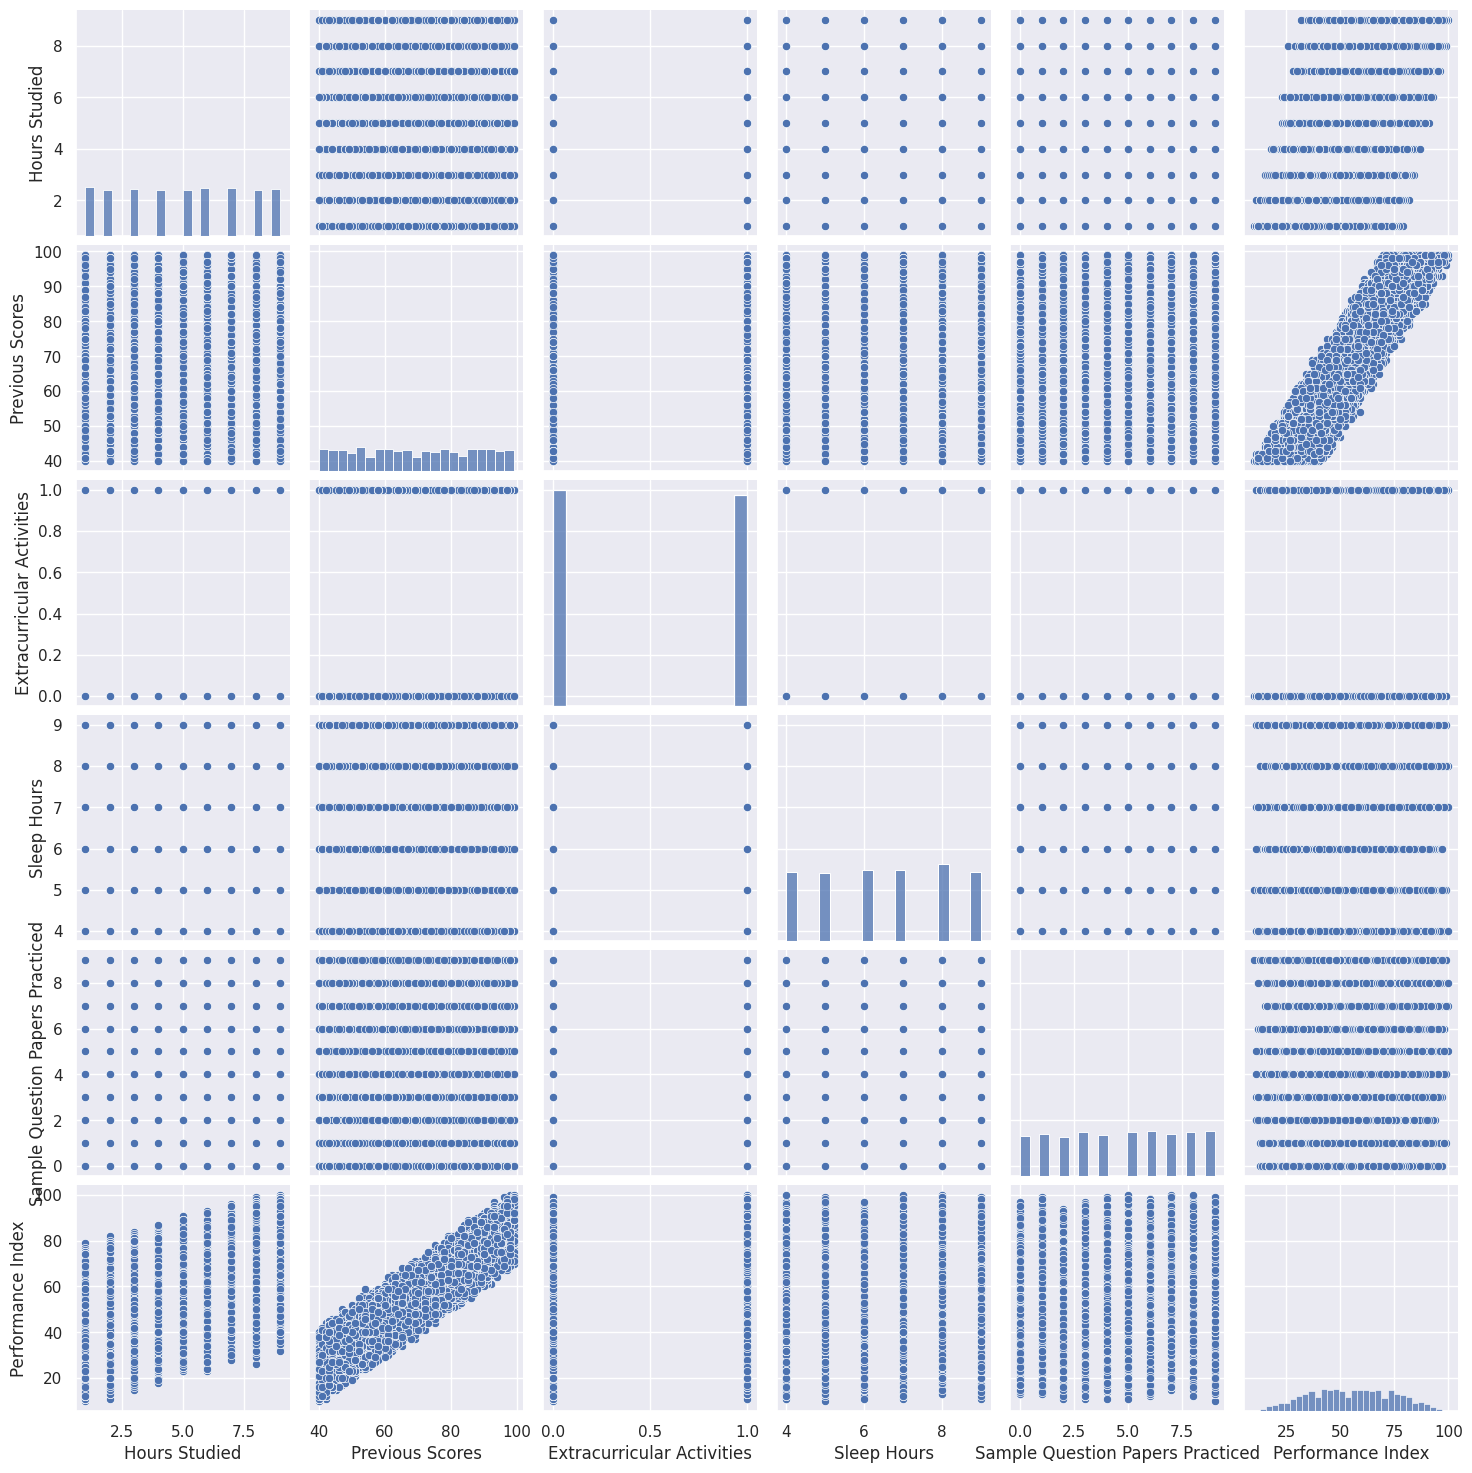

In [11]:
sns.pairplot(performance)

Text(0.5, 1.0, 'Multi-Collinearity of Features')

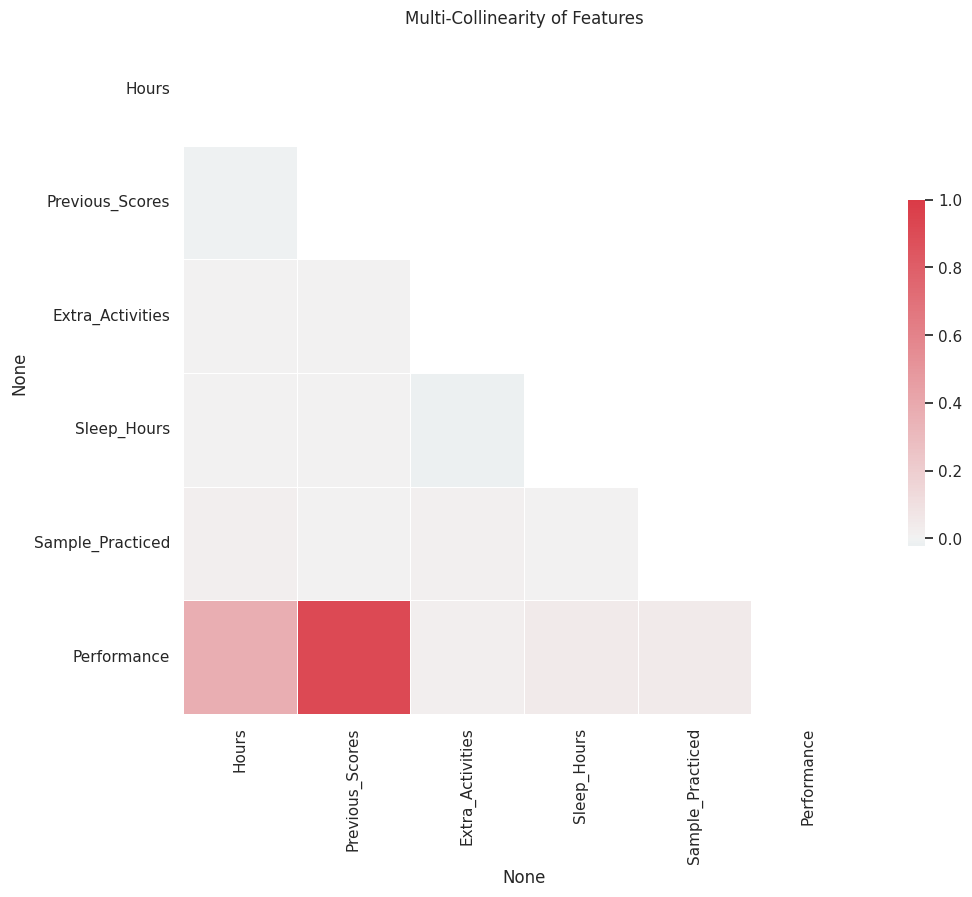

In [33]:
import matplotlib.pyplot as plt
sns.set(style="white")
corr = performance.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

* Another way to analyse the data is heatmap, correlation heatmap is a visual graphic that shows how each variable in the dataset are correlated to one another. -1 signifies zero correlation, while 1 signifies a perfect correlation.


In [12]:
performance.columns=[['Hours','Previous_Scores','Extra_Activities','Sleep_Hours','Sample_Practiced','Performance'	]]
performance.columns

MultiIndex([(           'Hours',),
            ( 'Previous_Scores',),
            ('Extra_Activities',),
            (     'Sleep_Hours',),
            ('Sample_Practiced',),
            (     'Performance',)],
           )

# Preparig the data

In [13]:
X=performance.iloc[:, :-1]
y=performance['Performance']


In [14]:
X.head()

,Hours,Previous_Scores,Extra_Activities,Sleep_Hours,Sample_Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [15]:
y.head()

,Performance
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X,y, test_size = 1/3)


* Normalizing the data so the range of number don't vary that nuch, it is a good step to improve the model.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

## Training the model

* For training the model I will use two packages (sklearn & statsmodels) wich final result should be the same.

### frist we will implement SKlearn modela

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[22.83559097 60.00754062  0.59781616  2.40112588  1.69276697]]
[11.49430959]


* The coefficients for the 5 feature , We will compare them to the stats model later.

[[22.82818552 60.04403665  0.63072803  2.47312241  1.8252352 ]]

In [23]:
y_pred = lr.predict(x_test)

* For testing the model I will use MSE(mean squared error) and R^2
* From the R^2 we could see how the inputs(features) affects the output.
* R^2 = 0.9888842 that means  98% of the performance values depends on the 5 features above.

In [24]:
import sklearn.metrics as metrics
mse=metrics.mean_squared_error(y_test, y_pred)
r2 =metrics.r2_score(y_test, y_pred)
print('MSE =',mse)
print('R2 = ',r2)


MSE = 4.080048404394895
R2 =  0.9889962928550019


### Implementing Statsmodel OLS

In [25]:
from statsmodels.api import OLS
model=OLS(y_test,x_test).fit()

* The coolest this in Stats model is summary() method which descripes a lot of thing in the model like (R^2, coefficients , intercepts,...)

* As we can see the coefficients are  close to the previous model.

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Performance   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.540e+05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                        0.00
Time:                        12:59:22   Log-Likelihood:                         -9230.9
No. Observations:                3334   AIC:                                  1.847e+04
Df Residuals:                    3329   BIC:                                  1.850e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.2241      0.187    145.841      0.000      26.858      27.590
x2            65.7160      0.198    332.296      0.000      65.328      66.104
x3             2.4775      0.129     19.257      0.000       2.225       2.730
x4             6.6621      0.176     37.812      0.000       6.317       7.008
x5             6.3555      0.187     33.936      0.000       5.988       6.723
==============================================================================
Omnibus:                        6.043   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.399
Skew:                           0.043   Prob(JB):                       0.0672
Kurtosis:                       2.823   Cond. No.                         3.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.tools.eval_measures import mse

In [28]:
y_pred = lr.predict(x_test)

In [29]:
mse(y_test, y_pred, axis=0)

array([4.0800484])

*As We can see also R^2 and MSE are almost the same in (statsmodels, Sklearn)

## Results
* In conclusion we could obtain some information from the coefficients


1.   The coefficient of the studying hours is(2) which mean that for evry hour the studetn study ,his performance is liklely to increase by 2.
2.   The cofficient

